In [1]:
import tensorflow as tf 
import matplotlib as mpl
import matplotlib.pyplot as plt

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [3]:
from pandas import read_csv
from datetime import datetime
# load data
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
dataset = read_csv('/content/drive/MyDrive/VDT2022/mini-project/stroke_recovery_dataset/protocol/sb01.csv',  parse_dates = [1], index_col=0, date_parser=parser)

dataset = dataset.set_index('Date')
dataset.columns = ['counts', 'speed']
# summarize first 5 rows
print(dataset.head(5))

            counts   speed
Date                      
2020-01-01   394.0  1.1506
2020-01-02   397.0  1.1504
2020-01-03   382.0  1.1563
2020-01-04   395.0  1.1561
2020-01-05   394.0  1.1540


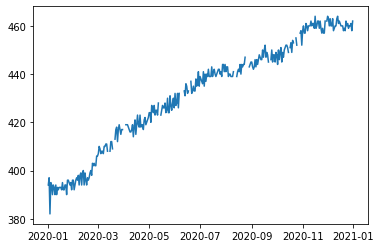

In [4]:
plt.plot(dataset.counts)

In [5]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [6]:
# load dataset
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')
dataset = read_csv('/content/drive/MyDrive/VDT2022/mini-project/stroke_recovery_dataset/protocol/sb01.csv',  
                  	parse_dates = [1], 
										index_col=0, 
										date_parser=parser)

dataset = dataset.set_index('Date')
dataset.columns = ['counts', 'speed']

cols = ['counts', 'speed']
dataset = dataset.loc[dataset.index, cols]
dataset = dataset.interpolate()
dataset.head(5)

,counts,speed
Date,,
2020-01-01,394.0,1.1506
2020-01-02,397.0,1.1504
2020-01-03,382.0,1.1563
2020-01-04,395.0,1.1561
2020-01-05,394.0,1.1540


In [60]:
counts_trend = read_csv('/content/counts_trend.csv')
speed_trend = read_csv('/content/speed_trend.csv')

In [ ]:
counts_trend.head(5)

In [ ]:
dataset.counts[0:274] = counts_trend.counts_trend
dataset.speed[0:274] = speed_trend.speed_trend

In [ ]:
dataset.head(5)

,counts,speed
Date,,
2020-01-01,392.038602,1.1506
2020-01-02,391.828795,1.1504
2020-01-03,391.516005,1.1563
2020-01-04,391.797150,1.1561
2020-01-05,391.822646,1.1540


In [8]:
values = dataset.values
# integer encode direction
# encoder = LabelEncoder()
# values[:,0] = encoder.fit_transform(values[:,0])
# # ensure all data is float 
# values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [9]:
# specify the number of lag days
n_hours = 3
n_features = 2
# frame as supervised learning
reframed = series_to_supervised(scaled, n_hours, 1)
print(reframed.shape)

# split into train and test sets
values = reframed.values
n_train = 274
train = values[:n_train, :]
test = values[n_train:, :]

(363, 8)


In [45]:
# split into input and outputs
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, 6:8]
test_X, test_y = test[:, :n_obs], test[:, 6:8]
print(train_X.shape, len(train_X), train_y.shape)
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], n_hours, n_features))
test_X = test_X.reshape((test_X.shape[0], n_hours, n_features))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(274, 6) 274 (274, 2)
(274, 3, 2) (274, 2) (89, 3, 2) (89, 2)


Epoch 1/150
3/3 - 4s - loss: 0.4557 - val_loss: 0.9043 - 4s/epoch - 1s/step
Epoch 2/150
3/3 - 0s - loss: 0.4196 - val_loss: 0.8463 - 46ms/epoch - 15ms/step
Epoch 3/150
3/3 - 0s - loss: 0.3838 - val_loss: 0.7879 - 42ms/epoch - 14ms/step
Epoch 4/150
3/3 - 0s - loss: 0.3482 - val_loss: 0.7289 - 41ms/epoch - 14ms/step
Epoch 5/150
3/3 - 0s - loss: 0.3128 - val_loss: 0.6686 - 42ms/epoch - 14ms/step
Epoch 6/150
3/3 - 0s - loss: 0.2770 - val_loss: 0.6063 - 41ms/epoch - 14ms/step
Epoch 7/150
3/3 - 0s - loss: 0.2406 - val_loss: 0.5413 - 41ms/epoch - 14ms/step
Epoch 8/150
3/3 - 0s - loss: 0.2058 - val_loss: 0.4753 - 45ms/epoch - 15ms/step
Epoch 9/150
3/3 - 0s - loss: 0.1742 - val_loss: 0.4082 - 40ms/epoch - 13ms/step
Epoch 10/150
3/3 - 0s - loss: 0.1446 - val_loss: 0.3402 - 44ms/epoch - 15ms/step
Epoch 11/150
3/3 - 0s - loss: 0.1187 - val_loss: 0.2725 - 41ms/epoch - 14ms/step
Epoch 12/150
3/3 - 0s - loss: 0.0980 - val_loss: 0.2094 - 45ms/epoch - 15ms/step
Epoch 13/150
3/3 - 0s - loss: 0.0831 - va

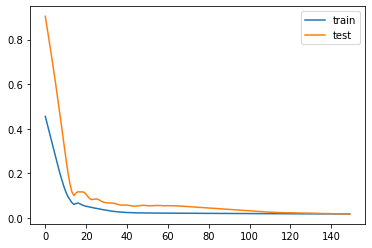

In [48]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(2))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=150, batch_size=92, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [49]:
# make a prediction counts
yhat = model.predict(test_X)
# test_Xc = test_X.reshape((test_X.shape[0], n_hours*n_features))
# invert scaling for forecast
# inv_yhat = concatenate((yhat, test_Xc[:, -1:]), axis=1)
inv_yhat = scaler.inverse_transform(yhat)
# invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_Xc[:, -1:]), axis=1)
inv_y = scaler.inverse_transform(test_y)

In [69]:
counts_y = inv_y[:,0]
counts_yhat = inv_yhat[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(counts_y, counts_yhat))
print('Test RMSE: %.6f' % rmse)
# calculate MAE
mae = mean_absolute_error(counts_y, counts_yhat)
print('Test MAE: %.6f' % mae)
# calculate MAPE
mape = mean_absolute_percentage_error(counts_y, counts_yhat)
print('Test MAPE: %.6f' % mape)

Test RMSE: 1.955751
Test MAE: 1.664830
Test MAPE: 0.003642


In [54]:
speed_y = inv_y[:,1]
speed_yhat = inv_yhat[:,1]
# calculate RMSE
rmse = sqrt(mean_squared_error(speed_y, speed_yhat))
print('Test RMSE: %.6f' % rmse)

Test RMSE: 0.002006


In [55]:
speed_y = inv_y[:,1]
speed_yhat = inv_yhat[:,1]
# calculate MAE
mae = mean_absolute_error(speed_y, speed_yhat)
print('Test MAE: %.6f' % mae)

Test MAE: 0.001670


In [57]:
speed_y = inv_y[:,1]
speed_yhat = inv_yhat[:,1]
# calculate MAPE
mape = mean_absolute_percentage_error(speed_y, speed_yhat)
print('Test MAE: %.6f' % mape)

Test MAE: 0.001358
